<h1><b>Análise Exploratória de Dados</b><br>
<i>Diabetes Health Indicators</i></h1>

<b>O conjunto de dados contém as seguintes variáveis:</b><br><i>
<b>idade:</b> Idade do paciente em anos (18–90).<br>
<b>gênero:</b> Sexo do paciente. Valores possíveis: 'Masculino', 'Feminino', 'Outro'.<br>
<b>etnia:</b> Origem étnica do paciente. Valores possíveis: 'Branco', 'Hispânico', 'Negro', 'Asiático', 'Outro'.<br>
<b>educação_nível:</b> Nível educacional mais alto concluído. Valores possíveis: 'No formal', 'Highschool', 'Graduado', 'Pós-Graduação'.<br>
<b>nível_de_renda:</b> Categoria de renda do paciente. Valores possíveis: 'Baixa', 'Médio', 'Alto'.<br>
<b>emprego_status:</b> Situação profissional atual. Valores possíveis: 'Empregado', 'Desempregado', 'Aposentado', 'Estudante'.<br>
<b>fumar_status:</b> Histórico de tabagismo. Valores possíveis: 'Nunca', 'Ex-', 'Atual'.<br>
<b>álcool_consumo_per_week:</b> Quantidade média de bebidas alcoólicas consumidas por semana (0–30).<br>
<b>física_atividade_minutos_per_week:</b> Tempo médio semanal de atividade física em minutos (0–600).<br>
<b>diet_score:</b> Pontuação da qualidade da dieta (0–10), onde valores maiores indicam alimentação mais saudável.<br>
<b>sleep_hours_per_day:</b> Média de horas de sono por dia (3–12).<br>
<b>screen_time_hours_per_day:</b> Média de horas diárias de tempo de tela (0–12).<br>
<b>família_história_diabetes:</b> Indica presença de histórico familiar de diabetes (0 = Não, 1 = Sim).<br>
<b>hipertensão_história:</b> Indica histórico de hipertensão (0 = Não, 1 = Sim).<br>
<b>cardiovascular_história:</b> Indica histórico de doenças cardiovasculares (0 = Não, 1 = Sim).<br>
<b>bmi:</b> Índice de Massa Corporal (kg/m²), variando entre 15–45.<br>
<b>cintura_to_hip_ratio:</b> Relação entre circunferência da cintura e do quadril (0.7–1.2).<br>
<b>systolic_bp:</b> Pressão arterial sistólica em mmHg (90–180).<br>
<b>diastolic_bp:</b> Pressão arterial diastólica em mmHg (60–120).<br>
<b>heart_rate:</b> Frequência cardíaca em repouso (batimentos por minuto), variando entre 50–120 bpm.<br>
<b>colesterol_total:</b> Colesterol total no sangue (mg/dL), variando entre 120–300.<br>
<b>hdl_colesterol:</b> Colesterol HDL (mg/dL), conhecido como “colesterol bom” (20–100).<br>
<b>ldl_colesterol:</b> Colesterol LDL (mg/dL), conhecido como “colesterol ruim” (50–200).<br>
<b>triglicerídeos:</b> Nível de triglicerídeos no sangue (mg/dL), variando entre 50–500.<br>
<b>glicose_fasting:</b> Glicemia em jejum (mg/dL), variando entre 70–250.<br>
<b>glicose_postprandial:</b> Glicemia após refeição (mg/dL), variando entre 90–350.<br>
<b>insulina_nível:</b> Nível de insulina no sangue (μU/mL), variando entre 2–50.<br>
<b>hba1c:</b> Hemoglobina glicada (%), indicador da média de glicose nos últimos meses (4–14%).<br>
<b>diabetes_risk_score:</b> Pontuação calculada de risco de diabetes (0–100), onde valores maiores indicam maior risco estimado.<br>
<b>diabetes_estágio:</b> Estágio da condição relacionada ao diabetes. Valores possíveis: 'No Diabetes', 'Pré-Diabetes', 'Tipo 1', 'Tipo 2', 'Gestacional'.<br>
<b>diagnosticada_diabetes:</b> Variável alvo. Indica se o paciente foi diagnosticado com diabetes (0 = Não, 1 = Sim).<br>

### Importação das Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
from scipy.stats import chi2_contingency

Configurações de estilo para os gráficos

In [2]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'utils')))

from plot_config import set_seaborn
set_seaborn()

### Importação e pré-visualização dos dados

In [19]:
df_raw = pd.read_csv("./../../data/raw/diabetes_health_indicators.csv")
pd.options.display.float_format = '{:.2f}'.format

display(df_raw.head().T)
registros = df_raw.shape[0]
print(f"\n{registros} registros e {df_raw.shape[1]} variáveis")

,0,1,2,3,4
age,58,48,60,74,46
gender,Male,Female,Male,Female,Male
ethnicity,Asian,White,Hispanic,Black,White
education_level,Highschool,Highschool,Highschool,Highschool,Graduate
income_level,Lower-Middle,Middle,Middle,Low,Middle
employment_status,Employed,Employed,Unemployed,Retired,Retired
smoking_status,Never,Former,Never,Never,Never
alcohol_consumption_per_week,0,1,1,0,1
physical_activity_minutes_per_week,215,143,57,49,109
diet_score,5.70,6.70,6.40,3.40,7.20



100000 registros e 31 variáveis


In [5]:
df_columns = [
    "age",
    "gender",
    "ethnicity",
    "education_level",
    "income_level",
    "employment_status",
    "smoking_status",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "sleep_hours_per_day",
    "screen_time_hours_per_day",
    "bmi"
]

df = df_raw[df_columns]

### Quantidade de dados nulos

In [6]:
df.isnull().sum()

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
diagnosed_diabetes                    0
dtype: int64

### Tipos de dados

In [7]:
df.dtypes

age                                     int64
gender                                    str
ethnicity                                 str
education_level                           str
income_level                              str
employment_status                         str
smoking_status                            str
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
diagnosed_diabetes                      int64
dtype: object

### Análise das variáveis categóricas
Categorias em cada variável

In [8]:
for i in df.select_dtypes(include="str").columns:
  print(f"{i}: {df[i].unique()}\n")

gender: <StringArray>
['Male', 'Female', 'Other']
Length: 3, dtype: str

ethnicity: <StringArray>
['Asian', 'White', 'Hispanic', 'Black', 'Other']
Length: 5, dtype: str

education_level: <StringArray>
['Highschool', 'Graduate', 'Postgraduate', 'No formal']
Length: 4, dtype: str

income_level: <StringArray>
['Lower-Middle', 'Middle', 'Low', 'Upper-Middle', 'High']
Length: 5, dtype: str

employment_status: <StringArray>
['Employed', 'Unemployed', 'Retired', 'Student']
Length: 4, dtype: str

smoking_status: <StringArray>
['Never', 'Former', 'Current']
Length: 3, dtype: str



Quantidade de dados de cada categoria

In [12]:
for i in df.select_dtypes(include="str").columns:
    print(f"{df[i].value_counts()}\n")

gender
Female    50216
Male      47771
Other      2013
Name: count, dtype: int64

ethnicity
White       44997
Hispanic    20103
Black       17986
Asian       11865
Other        5049
Name: count, dtype: int64

education_level
Highschool      44891
Graduate        35037
Postgraduate    14972
No formal        5100
Name: count, dtype: int64

income_level
Middle          35152
Lower-Middle    25150
Upper-Middle    19866
Low             14830
High             5002
Name: count, dtype: int64

employment_status
Employed      60175
Retired       21761
Unemployed    11918
Student        6146
Name: count, dtype: int64

smoking_status
Never      59813
Current    20176
Former     20011
Name: count, dtype: int64



Proporção entre categoria e o alvo

In [15]:
for i in df.select_dtypes(include="str").columns:
    print(f"{df.groupby(i)['diagnosed_diabetes'].mean()}\n")

gender
Female   0.60
Male     0.60
Other    0.62
Name: diagnosed_diabetes, dtype: float64

ethnicity
Asian      0.60
Black      0.60
Hispanic   0.59
Other      0.61
White      0.60
Name: diagnosed_diabetes, dtype: float64

education_level
Graduate       0.60
Highschool     0.60
No formal      0.60
Postgraduate   0.59
Name: diagnosed_diabetes, dtype: float64

income_level
High           0.61
Low            0.60
Lower-Middle   0.60
Middle         0.60
Upper-Middle   0.60
Name: diagnosed_diabetes, dtype: float64

employment_status
Employed     0.60
Retired      0.60
Student      0.60
Unemployed   0.60
Name: diagnosed_diabetes, dtype: float64

smoking_status
Current   0.60
Former    0.60
Never     0.60
Name: diagnosed_diabetes, dtype: float64



### Teste Qui-quadrado.

Um valor de p <= 0.05 rejeitamos a hipótese nula,<br>
ou seja, o alvo depende das variáveis.

In [28]:
for col in df.columns:
    tabela = pd.crosstab(df[col], df["diagnosed_diabetes"])
    chi2, p, _, _ = chi2_contingency(tabela)
    print(f"{col} -> p-value: {p}")

age -> p-value: 0.0
gender -> p-value: 0.09880536552392973
ethnicity -> p-value: 0.32118294592539454
education_level -> p-value: 0.3400828191688993
income_level -> p-value: 0.3554183584482451
employment_status -> p-value: 0.38922869181679415
smoking_status -> p-value: 0.927242187198018
alcohol_consumption_per_week -> p-value: 0.5812353707620096
physical_activity_minutes_per_week -> p-value: 6.911920604699961e-100
diet_score -> p-value: 2.3085120669805283e-23
sleep_hours_per_day -> p-value: 0.762969942207953
screen_time_hours_per_day -> p-value: 0.02608958595596778
bmi -> p-value: 6.769041219391212e-120
diagnosed_diabetes -> p-value: 0.0


Alvo

In [27]:
pd.crosstab(pd.qcut(df_raw["hba1c"], 4),
            df_raw["diagnosed_diabetes"],
            normalize="index")

diagnosed_diabetes,0,1
hba1c,,
"(3.999, 5.97]",0.84,0.16
"(5.97, 6.52]",0.75,0.25
"(6.52, 7.07]",0.00,1.00
"(7.07, 9.8]",0.00,1.00


### Análise de Outilies

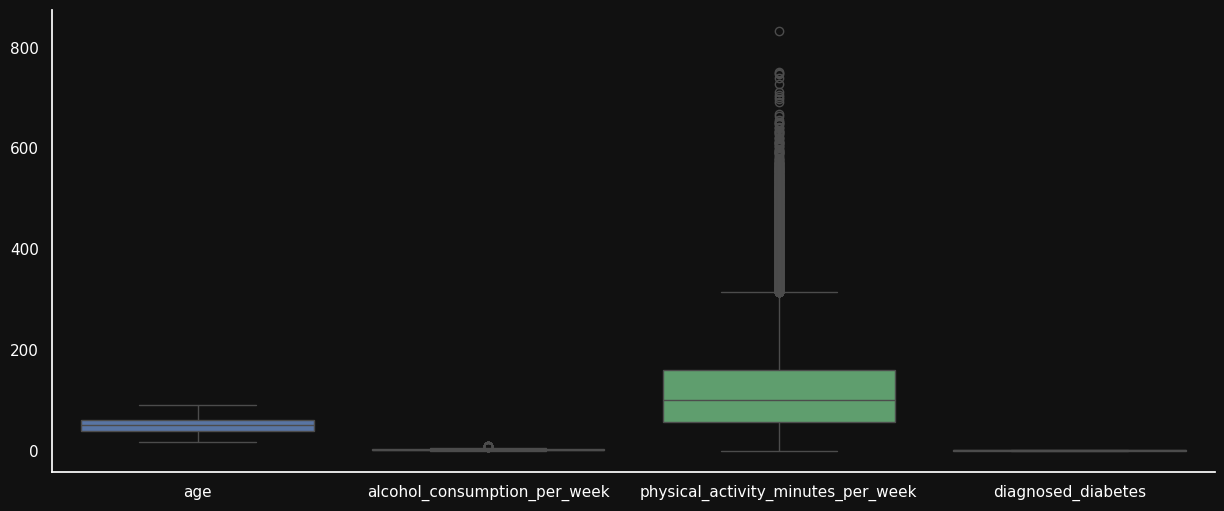

In [33]:
numericas_int = df.select_dtypes(include="int").columns

sns.boxplot(df[numericas_int]);

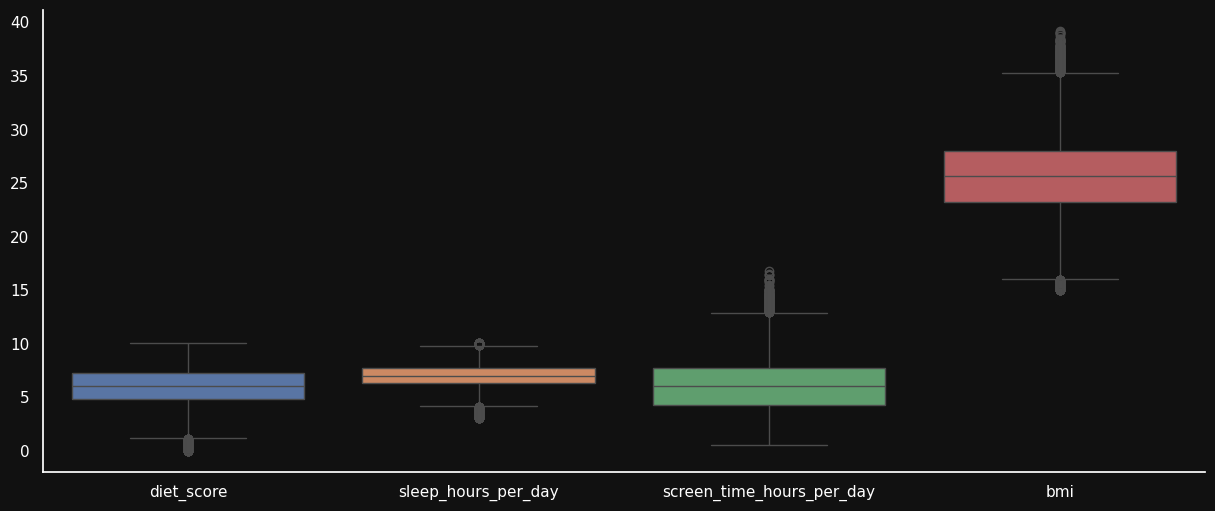

In [34]:
numericas_float = df.select_dtypes(include="float").columns

sns.boxplot(df[numericas_float]);

Regra do 1,5 × Distância Interquartílica para identificação de Outlires

In [35]:
numericas = df.select_dtypes(include="number").columns

for i in df[numericas].columns:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  outliers_iqr = df[(df[i] < limite_inferior) | (df[i] > limite_superior)]

  print(f"Mínimo da variável '{i}' = {df[i].min()}\nMáximo da variável '{i}' = {df[i].max()}")
  print(f"Limites da variável '{i}' = {round(limite_inferior, 2)} a {round(limite_superior, 2)}")
  print(f"Outliers da variável '{i}' = {outliers_iqr[i].unique()}\n")

Mínimo da variável 'age' = 18
Máximo da variável 'age' = 90
Limites da variável 'age' = 6.0 a 94.0
Outliers da variável 'age' = []

Mínimo da variável 'alcohol_consumption_per_week' = 0
Máximo da variável 'alcohol_consumption_per_week' = 10
Limites da variável 'alcohol_consumption_per_week' = -2.0 a 6.0
Outliers da variável 'alcohol_consumption_per_week' = [ 9  8  7 10]

Mínimo da variável 'physical_activity_minutes_per_week' = 0
Máximo da variável 'physical_activity_minutes_per_week' = 833
Limites da variável 'physical_activity_minutes_per_week' = -97.5 a 314.5
Outliers da variável 'physical_activity_minutes_per_week' = [364 369 317 425 384 412 341 387 493 324 372 401 529 353 346 355 345 330
 439 325 422 318 448 344 399 339 404 321 334 395 371 406 381 316 391 352
 379 557 634 322 467 397 354 326 407 335 400 413 446 427 409 332 524 327
 350 386 328 389 382 349 348 402 549 494 320 331 315 323 380 459 442 450
 488 338 368 360 336 489 511 433 470 560 517 411 373 319 445 343 392 394
 365 4

Valores que podem ser considerados outliers para cada variável aplicando o contexto clínico:<br>
age → valores muito baixos (crianças) ou muito altos (120 anos).<br>
bmi → valores < 10 ou > 70 geralmente são outliers.<br>
HbA1c_level → acima de 15 já é raro.<br>
blood_glucose_level → valores > 300–400 podem ser extremos.

In [33]:
df_without_outlier = df[(df["age"] > 17) & (df["bmi"].between(10, 70))]

print(f"Ao remover os outliers temos uma perda de {registros - df_without_outlier.shape[0]} registros")
print(f"Que representam {round(100 - ((df_without_outlier.shape[0] / registros) * 100), 2)}% dos dados")
print(f"Gerando uma amostra com {df_without_outlier.shape[0]} registros e {df_without_outlier.shape[1]} variáveis")

Ao remover os outliers temos uma perda de 17236 registros
Que representam 17.24% dos dados
Gerando uma amostra com 82764 registros e 10 variáveis


Na análise exploratória, foi detectado que 17,2% dos registros estavam fora dos limites de idade definidos (menores de 18 anos).
Como a exclusão dessa quantidade representa uma perda significativa de informação, será criado um dataframe com a variável 'outlier_age' que explica esses outliers sem retira-los para testes alternativos.

In [34]:
df_outlier_age = df.copy()
df_outlier_age = df_outlier_age[df_outlier_age["bmi"].between(10, 70)]
df_outlier_age["outlier_age"] = np.where(df_outlier_age["age"] < 18, 1, 0)

print(f"Ao remover os outliers temos uma perda de {registros - df_outlier_age.shape[0]} registros")
print(f"Que representam {round(100 - ((df_outlier_age.shape[0] / registros) * 100), 2)}% dos dados")
print(f"Gerando uma amostra com {df_outlier_age.shape[0]} registros e {df_outlier_age.shape[1]} variáveis")

Ao remover os outliers temos uma perda de 19 registros
Que representam 0.02% dos dados
Gerando uma amostra com 99981 registros e 11 variáveis


### Proporção de dados na variável alvo

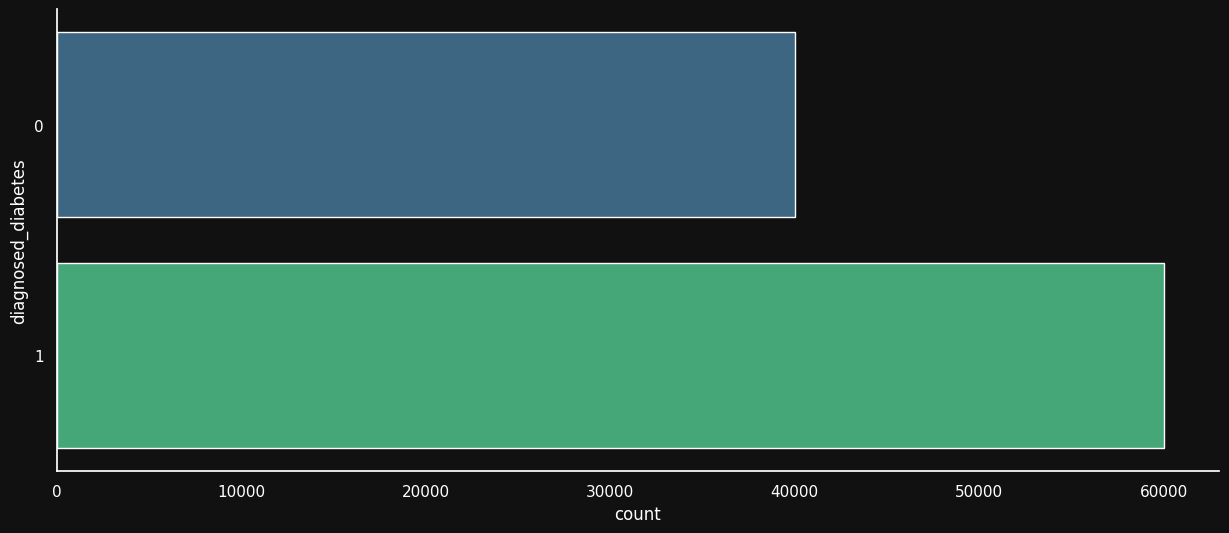

In [36]:
sns.countplot(y=df["diagnosed_diabetes"], palette="viridis", hue=df["diagnosed_diabetes"], legend=False);

In [37]:
proportion_diabetes = df["diagnosed_diabetes"].value_counts(normalize=True)
count_diabetes = df["diagnosed_diabetes"].value_counts()

print(f"Quantidade de dados com pacientes negativo para diabetes: {count_diabetes[0]}")
print(f"Quantidade de dados com pacientes positivo para diabetes: {count_diabetes[1]}\n")

print(f"Proporção de negativos para diabetes: {float(proportion_diabetes[0])}")
print(f"Proporção de positivos para diabetes: {float(proportion_diabetes[1])}\n")

if float(proportion_diabetes[0]) < 0.35 or float(proportion_diabetes[1]) < 0.35:
    print("Dados desbalanceados.")
else:
    print("Perfeito!\nDados balanceados.")

Quantidade de dados com pacientes negativo para diabetes: 40002
Quantidade de dados com pacientes positivo para diabetes: 59998

Proporção de negativos para diabetes: 0.40002
Proporção de positivos para diabetes: 0.59998

Perfeito!
Dados balanceados.
